In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/Edge-2 IoT Dataset.csv', low_memory=False)

In [ ]:
from sklearn.utils import shuffle
drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4",
                "http.file_data","http.request.full_uri","icmp.transmit_timestamp",
                "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",
                "tcp.dstport", "udp.port", "mqtt.msg"]

df.drop(drop_columns, axis=1, inplace=True)
df.dropna(axis=0, how='any', inplace=True)
df.drop_duplicates(subset=None, keep="first", inplace=True)
df = shuffle(df)
df.isna().sum()
print(df['Attack_type'].value_counts())

Attack_type
Normal                   24101
DDoS_UDP                 14498
DDoS_ICMP                13096
DDoS_HTTP                10495
SQL_injection            10282
DDoS_TCP                 10247
Uploading                10214
Vulnerability_scanner    10062
Password                  9972
Backdoor                  9865
Ransomware                9689
XSS                       9543
Port_Scanning             8921
Fingerprinting             853
MITM                       358
Name: count, dtype: int64


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

encode_text_dummy(df,'http.request.method')
encode_text_dummy(df,'http.referer')
encode_text_dummy(df,"http.request.version")
encode_text_dummy(df,"dns.qry.name.len")
encode_text_dummy(df,"mqtt.conack.flags")
encode_text_dummy(df,"mqtt.protoname")
encode_text_dummy(df,"mqtt.topic")

In [ ]:
df.to_csv('preprocessed_DNN.csv', encoding='utf-8', index=False)

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv('./preprocessed_DNN.csv', low_memory=False)
df

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,tcp.ack_raw,...,dns.qry.name.len-1.debian.pool.ntp.org,dns.qry.name.len-2.debian.pool.ntp.org,dns.qry.name.len-3.debian.pool.ntp.org,dns.qry.name.len-_googlecast._tcp.local,mqtt.conack.flags-0,mqtt.conack.flags-0x00000000,mqtt.protoname-0,mqtt.protoname-MQTT,mqtt.topic-0,mqtt.topic-Temperature_and_Humidity
0,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,True,False,True,False
1,0,0,0,0,0,0,0,0,87,3825046693,...,False,False,False,False,True,False,True,False,True,False
2,0,0,0,0,0,0,0,0,263,2156141524,...,False,False,False,False,True,False,True,False,True,False
3,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,True,False,True,False
4,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152191,0,0,0,0,0,0,0,0,488,68402531,...,False,False,False,False,True,False,True,False,True,False
152192,0,0,0,0,0,0,0,0,222,3479368776,...,False,False,False,False,True,False,True,False,True,False
152193,0,0,12017,1922,0,0,0,0,0,0,...,False,False,False,False,True,False,True,False,True,False
152194,0,0,0,0,0,0,0,0,5,608764753,...,False,False,False,False,True,False,True,False,True,False


In [ ]:
df['Attack_type'].value_counts()

,count
Attack_type,
Normal,24101
DDoS_UDP,14498
DDoS_ICMP,13096
DDoS_HTTP,10495
SQL_injection,10282
DDoS_TCP,10247
Uploading,10214
Vulnerability_scanner,10062
Password,9972


In [ ]:
feat_cols = list(df.columns)
label_col = "Attack_type"

feat_cols.remove(label_col)

In [ ]:
empty_cols = [col for col in df.columns if df[col].isnull().all()]
empty_cols

[]

In [ ]:
skip_list = ["icmp.unused", "http.tls_port", "dns.qry.type", "mqtt.msg_decoded_as"]

In [ ]:
df[skip_list[3]].value_counts()

,count
mqtt.msg_decoded_as,
0,152196


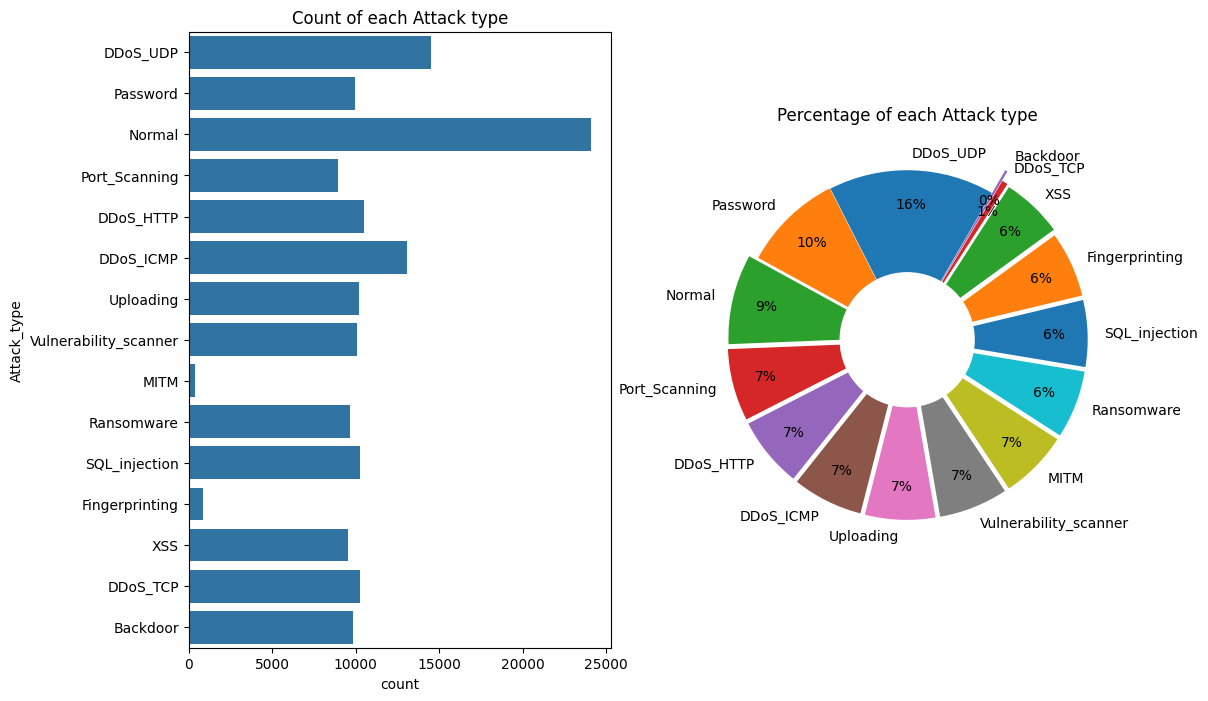

In [ ]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
explode = list((np.array(list(df[label_col].dropna().value_counts()))/sum(list(df[label_col].dropna().value_counts())))[::-1])[:]
labels = list(df[label_col].dropna().unique())[:]
sizes = df[label_col].value_counts()[:]

ax2.pie(sizes,  explode=explode, startangle=60, labels=labels, autopct='%1.0f%%', pctdistance=0.8)
ax2.add_artist(plt.Circle((0,0),0.4,fc='white'))
sns.countplot(y=label_col, data=df, ax=ax1)
ax1.set_title("Count of each Attack type")
ax2.set_title("Percentage of each Attack type")
plt.show()

In [ ]:
X = df.drop([label_col], axis=1)
y = df[label_col]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

del X
del y

In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train =  label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train =  min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(121756, 68, 1)
(30440, 68, 1)


In [ ]:
input_shape = X_train.shape[1:]

In [ ]:
print(X_train.shape, X_test.shape)
print(input_shape)

(121756, 68, 1) (30440, 68, 1)
(68, 1)


In [ ]:
num_classes = len(np.unique(y_train))
num_classes = 15
num_classes

15

In [ ]:
from  tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [ ]:
print(y_train.shape, y_test.shape)

(121756, 15) (30440, 15)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(input_shape[0], 1)))
model.add(MaxPooling1D(2))
# model.add(Conv1D(64, 3, activation='relu', input_shape=(input_shape)))
# model.add(MaxPooling1D(2))
# model.add(Conv1D(64, 3, activation='relu', input_shape=(input_shape)))
# model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_7 (Conv1D)               │ (None, 66, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 33, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 31, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 13, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        49,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,231 (317.31 KB)

 Trainable params: 81,231 (317.31 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Input, ZeroPadding1D
from tensorflow.keras.layers import MaxPooling1D, Add, AveragePooling1D
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
from keras.initializers import glorot_uniform
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.optimizers import Adam#input the model before this cell
#model = build_model(num_classes, input_shape=input_shape)
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss= tf.keras.metrics.categorical_crossentropy,
                  metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
#from livelossplot import PlotLossesKeras


#model_weights_file_path = "model_best_weights.h5"
#checkpoint = ModelCheckpoint(filepath=model_weights_file_path, monitor="val_loss", verbose=1, save_best_only=True, mode="min", save_weights_only=True)
#checkpoint = ModelCheckpoint(filepath=model_weights_file_path, monitor="val_loss", verbose=1, save_best_only=True, mode="min", save_weights_only=True)
early_stopping = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=10)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, mode="min", verbose=1, min_lr=0)
#plotlosses = PlotLossesKeras()
call_backs = [ early_stopping, lr_reduce]
EPOCHS = 15
BATCH_SIZE = 256
call_backs = [early_stopping, lr_reduce]
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    validation_split=0.1,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=call_backs,
                    #class_weight=class_weights,
                    verbose=1)

Epoch 1/15
476/476 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.4777 - loss: 1.4773 - val_accuracy: 0.5854 - val_loss: 0.9939 - learning_rate: 0.0010
Epoch 2/15
476/476 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.6009 - loss: 0.9585 - val_accuracy: 0.5925 - val_loss: 0.9174 - learning_rate: 0.0010
Epoch 3/15
476/476 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.6195 - loss: 0.9018 - val_accuracy: 0.6242 - val_loss: 0.8875 - learning_rate: 0.0010
Epoch 4/15
476/476 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.6386 - loss: 0.8728 - val_accuracy: 0.6625 - val_loss: 0.8628 - learning_rate: 0.0010
Epoch 5/15
476/476 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.6546 - loss: 0.8488 - val_accuracy: 0.6736 - val_loss: 0.8349 - learning_rate: 0.0010
Epoch 6/15
476/476 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.6688 - loss: 0.8273 - val_accuracy: 0.6801 - val_loss: 0.8193 - learning_rate: 0.0010
Epoch 7/15
476/476 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.6732 - l